## San Francisco Crime Classification
![sf crime](http://drive.google.com/uc?export=view&id=1WxNezzSSmypLqQfPd-bLajr09qvmjAHF)

### 샌프란시스코에서 발생한 범죄의 종류 예측
* Train Data를 기반으로한 머신러닝 모델을 활용해 Test Data의 범죄 종류를 예측할 것임.

### 컬럼 설명


* **Dates** - 범죄가 발생한 날짜와 시간.
* **Category** - 범죄의 세부적인 종류(ex: 절도, 살인, 뺑소니 등). 최종적으로 예측해야할 정답 칼럽임.
* **Descript** - 범죄의 세부 정보
* **DayOfWeek** - 범죄가 발생한 요일(월 ~ 일) 정보.
* **PdDistrict** - 범죄를 관할하는 경찰서.
* **Resolution** - 범죄의 상태, 범죄가 해결되었는지 여부
* **Address** - 범죄가 발생한 구체적인 주소.
* **X** - 범죄가 발생한 경도(Longitude) 좌표.
* **Y** - 범죄가 발생한 위도(Latitude) 좌표.


### 범죄의 종류(Category) 설명
* **LARCENY/THEFT** - 절도(경범죄)
* **OTHER OFFENSES** - 기타
* **NON-CRIMINAL** - 범죄가 아님?
* **ASSAULT** - 폭행
* **DRUG/NARCOTIC** - 마약
* **VEHICLE THEFT** - 차량 절도
* **VANDALISM** - 기물 파손
* **WARRANTS** - 구속
* **BURGLARY** - 절도(중범죄)
* **SUSPICIOUS OCC** - 의심스러운 행위
* **MISSING PERSON** - 실종
* **ROBBERY** - 강도
* **FRAUD** - 사기
* **FORGERY/COUNTERFEITING** - 위조
* **SECONDARY CODES** - 2차적 배경들이 있는 범죄
* **WEAPON LAWS** - 총기 사고
* **PROSTITUTION** - 매춘
* **TRESPASS** - 무단 침입
* **STOLEN PROPERTY** - 도난
* **SEX OFFENSES FORCIBLE** - 강제적 성범죄
* **DISORDERLY CONDUCT** - 문란 행위
* **DRUNKENNESS** - 과음
* **RECOVERED VEHICLE** - 차량 탈취
* **KIDNAPPING** - 납치, 유괴
* **DRIVING UNDER THE INFLUENCE** - 음주 운전
* **RUNAWAY** - 가출
* **LIQUOR LAWS** - 음주 및 기타 주류 유통 위반
* **ARSON** - 방화
* **LOITERING** - 의심스러운 배회 및 방황
* **EMBEZZLEMENT** - 횡령
* **SUICIDE** - 자살
* **FAMILY OFFENSES** - 가정 범죄
* **BAD CHECKS** - 부도 수표
* **BRIBERY** - 뇌물 수수
* **EXTORTION** - 갈취
* **SEX OFFENSES NON FORCIBLE** - 비강제적 성범죄
* **GAMBLING** - 도박
* **PORNOGRAPHY/OBSCENE MAT** - 음란행위, 외설행위
* **TREA** - 무단 침입

#### 라이브러리 import 

In [23]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# 시각화 library 호출
import seaborn as sns
color=sns.color_palette()
import matplotlib.pyplot as plt
%matplotlib inline

# 모델링에 필요한 library 호출
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

##### Data 로딩

In [24]:
train = pd.read_csv("SF_Crime/train.csv")

print("Train shape : ",train.shape)
train.head()

Train shape :  (878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


=> 데이터 상 Null값 존재하지 않음!

## EDA([Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis))

## 1. Dates

* 날짜, 시간별 범죄 유형별로 분석 및 시각화 하기 위해 '''Dates'''를 datetime 클래스로 변경 후 변수 생성.

In [26]:
# 클래스가 object인 Dates 칼럼을 datetime형식으로 변환
train["Dates"] = pd.to_datetime(train["Dates"])
# 변환 후, 년,월,일,시,분,초 단위로 변수 추가
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


### Q1-1) 가설

**1. 분(```Dates-minute```), 초(```Dates-second```)는 범죄의 발생 빈도를 판가름하는데 별 영향이 없을 것 같다.**   
- 가령 범죄자가 현재 시간이 정확히 37분이면 범죄를 저지르고, 43분이면 범죄를 저지르지 않는 이상행동을 하지 않을 것임.(**균일분포를 따르지 않을 것임**)

**2. 시간(```Dates-hour```)은 범죄 발생 빈도에 큰 영향을 미칠 것이다.**  
- 오전, 오후, 새벽 등 시간에 따라 범죄 발생비율에 차이가 있을 것임.

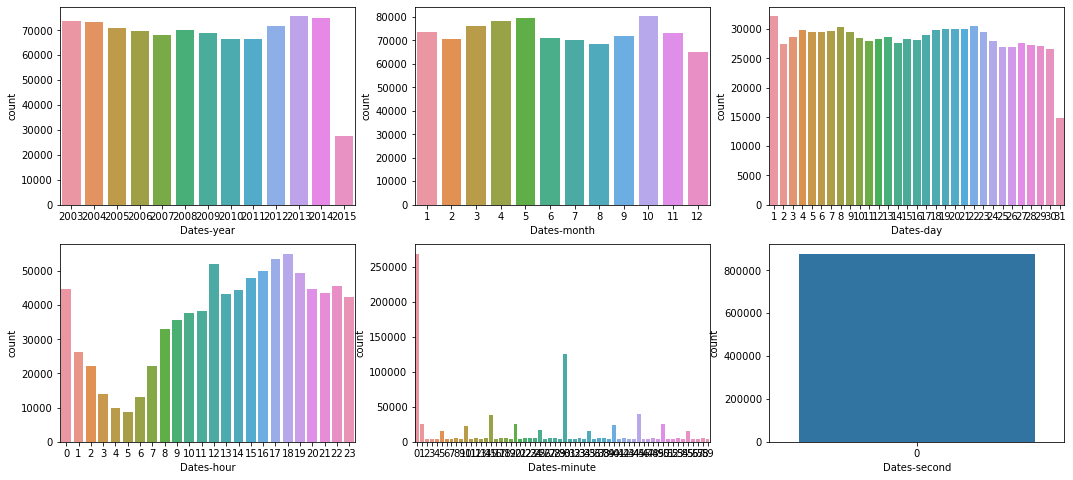

In [27]:
# seaborn을 통해 년,월,일,시,분,초를 2X3 행열로 시각화.
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x="Dates-year", ax=ax1)
sns.countplot(data=train, x="Dates-month", ax=ax2)
sns.countplot(data=train, x="Dates-day", ax=ax3)
sns.countplot(data=train, x="Dates-hour", ax=ax4)
sns.countplot(data=train, x="Dates-minute", ax=ax5)
sns.countplot(data=train, x="Dates-second", ax=ax6)

몇몇 부분은 우리의 예상과 일치하지만, 몇몇 부분은 차이가 있는 것 같습니다. 하나하나 살펴보겠습니다.

### Q1-2) 결과 해석

**1. 분(```Dates-minute```), 초(```Dates-second```)는 범죄의 발생 빈도를 판가름하는데 별 영향이 없을 것 같다.**

- 초(```Dates-second```)는 데이터가 전부 0으로 기록되어 있음. 따라서, 초(```Dates-second```) 칼럼을 feature로 넣어도 큰 의미가 없다고 해석할 수 있음.  
하지만 분(```Dates-minute```)은 다름. 범죄의 발생 빈도에 차이가 있고, 특이하게도 0분과 30분에 범죄가 빈번하게 발생하고 있음. 그 다음으로 순서대로 15분과 45분, 5분 10분 15분 20분 25분 등등으로 발생함. 예상과 다르므로 추가적으로 데이터 확인 필요.

**2. 시간(```Dates-hour```)은 범죄 발생 빈도에 큰 영향이 있을 것 같다.**

- 이는 시각화 결과와 일치함. 확실히 새벽에 범죄가 덜 발생하고, 오후와 저녁에 범죄가 많이 발생함. 하지만, 유독 12시에 범죄가 발생하는 빈도가 불규칙하게 높은 것 같음. 추가적으로 데이터 확인 필요.

#### Dates-minute 데이터 확인

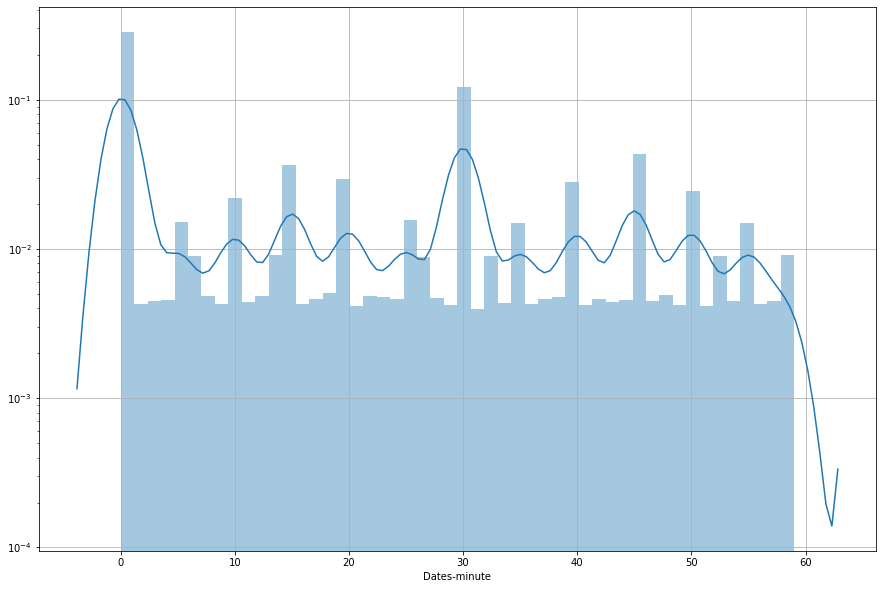

In [28]:
plt.figure(figsize=(15,10))
plt.grid()
# 분산 차이가 크기 때문에 로그스케일 적용 후 시각화
sns.distplot(train['Dates-minute'], hist_kws={'log':True})

=> 로그스케일 적용 후에도 '''Dates-minute'''에 대한 분산이 비교적 크다는 것을 확인함. 

- 본 데이터로는 정확한 원인을 파악할 수 없으나 예를 들어, 범죄 시간을 기록할 때 정확한 29분이라는 시간대신 편의상 25분이나 30분으로 범죄 발생 시간을 측정했을 가능성도 있음. 이러한 편의성 때문에 '''Dates-second''' 또한 0으로 측정될 수 있음.

### Q1-3) 개선사항


1. 초(```Dates-second```)는 전부 다 0으로 기록되어 있기 때문에, 범죄를 예측하는데 크게 중요하지 않을 것 같음. 따라서, feature에서 제거해도 문제 없다고 판단됨.
2. 분(```Dates-minute```)은 주로 5분 간격으로 집중되어 분포되어 있음을 볼 수 있는데 원인이 불명확하고 해석하기 까다로워 분석에서는 제거하기로 함.
3. 시간(```Dates-hour```) 데이터는 시간별로 범죄빈도에 차이가 있기때문에 예측 모델이 범죄를 예측하는데 큰 영향을 미칠 것 같음.

In [29]:
# 분(minute), 초(second) 제거
train = train.drop(['Dates-minute', 'Dates-second'], axis=1)

## 2. 좌표 X, Y

- 범죄가 구체적으로 어떤 위치에서 발생했는지에 대한 좌표 데이터임.

### Q2-1) 가설

**1. 샌프란시스코의 지도와 유사한 그림이 나올 것이다.**
- 샌프란시스코에서 발생한 범죄 데이터이기 때문에 샌프란시스코 지도와 유사할 것임
  
**2. 범죄 빈도에 따라 범죄가 자주 발생하는 지역과 그렇지 않은 지역이 구분될 것이다.**  
- 범죄가 밀집된 지역과 그렇지 않은 지역이 구분될 것 같음.

**3. 지역마다 자주 발생하는 범죄가 다를 것이다.**
- 특정 범죄의 빈도가 높은 지역이 존재할 것임. 예를 들어, 절도, 강도와 같은 범죄는 유동인구가 많은 지역에서 많이 발생할 것 같음. 

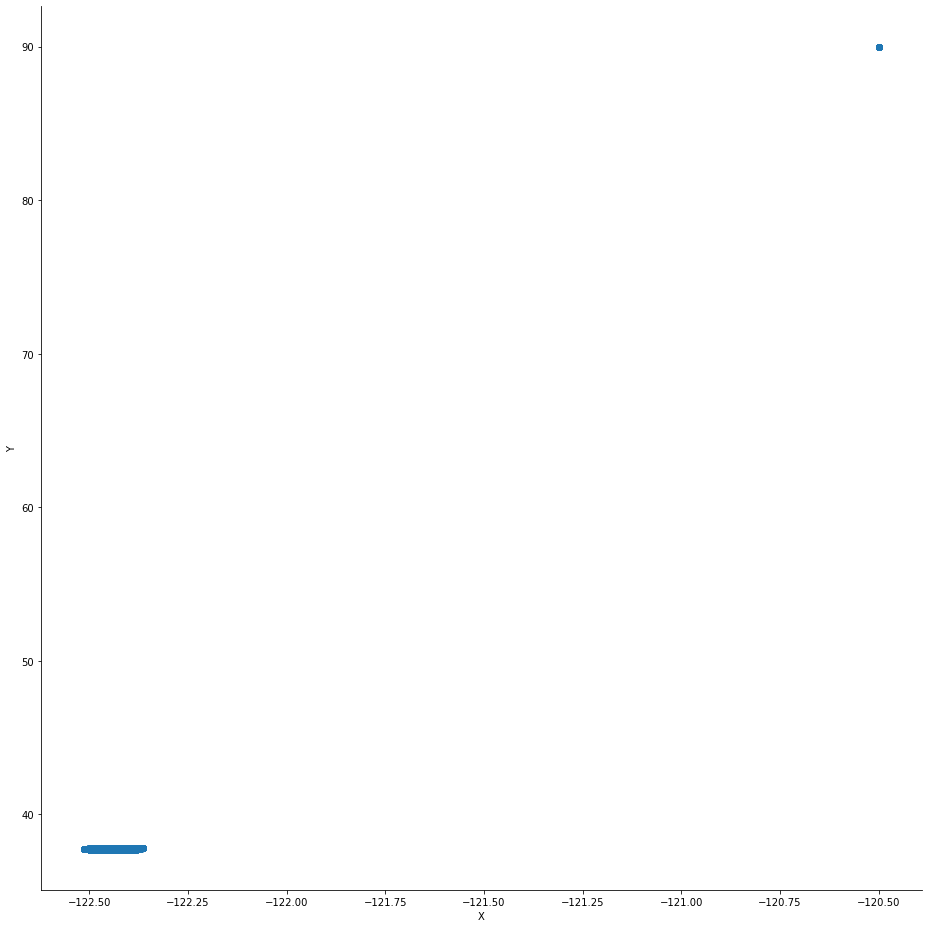

In [30]:
# seaborn을 활용해 좌표 시각화
sns.lmplot(data=train, x="X", y="Y", fit_reg=False, size=13)

=> 지도 형태가 아닌 좌표가 극단적으로 몰려있음을 확인할 수 있음.   
- 임의적으로 샌프란시스코의 한 곳의 좌표를 확인하니 Y = 37.7470304228248, X = -122.45477483697998이며 좌하단 분포에 속한다고 할 수 있음. 따라서, 우상단의 좌표들이 이상치 데이터로 해석할 수 있음.

In [31]:
# 아웃라이어 확인
print('좌표 최대값 :',train["X"].max(), train["Y"].max())
X_outliers = (train["X"] == train["X"].max())
Y_outliers = (train["Y"] == train["Y"].max())
outlier = train[X_outliers & Y_outliers]

print(outlier.shape)
outlier.head()

좌표 최대값 : -120.5 90.0
(67, 13)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11


=> 확인 결과, 총 67개의 아웃라이어가 나타남.  
- 이상치 데이터의 경우 수가 많다면 다른 데이터의 평균 값이나 KNN 등을 활용해 최근접 데이터 값으로 대체할 수 있지만 본 이상치는 전체 878049의 0.01%도 되지 않기 때문에 분석에 영향을 미치지 않을 것으로 판단하고 제거하기로 함.

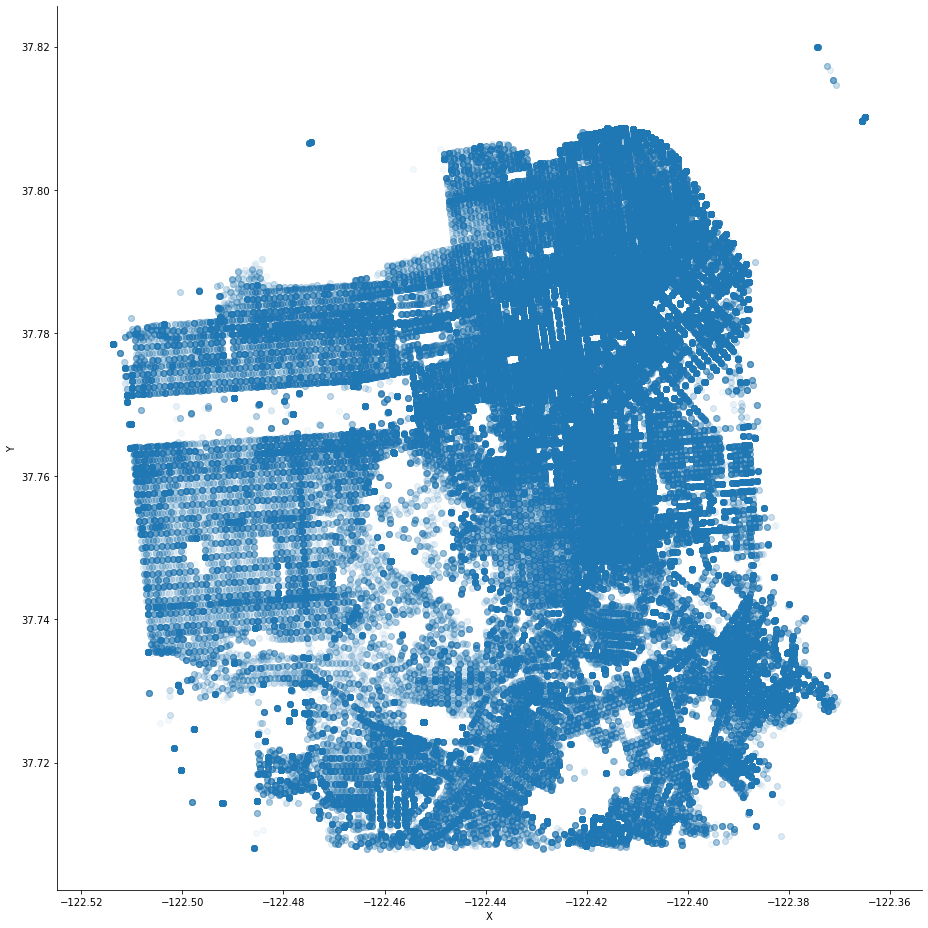

In [32]:
# 이상치 제거 후 다시 시각화 진행
train = train[~(X_outliers & Y_outliers)]

sns.lmplot(data=train, x="X", y="Y", fit_reg=False,
           size=13, scatter_kws={"alpha": .05}, palette="Set2")

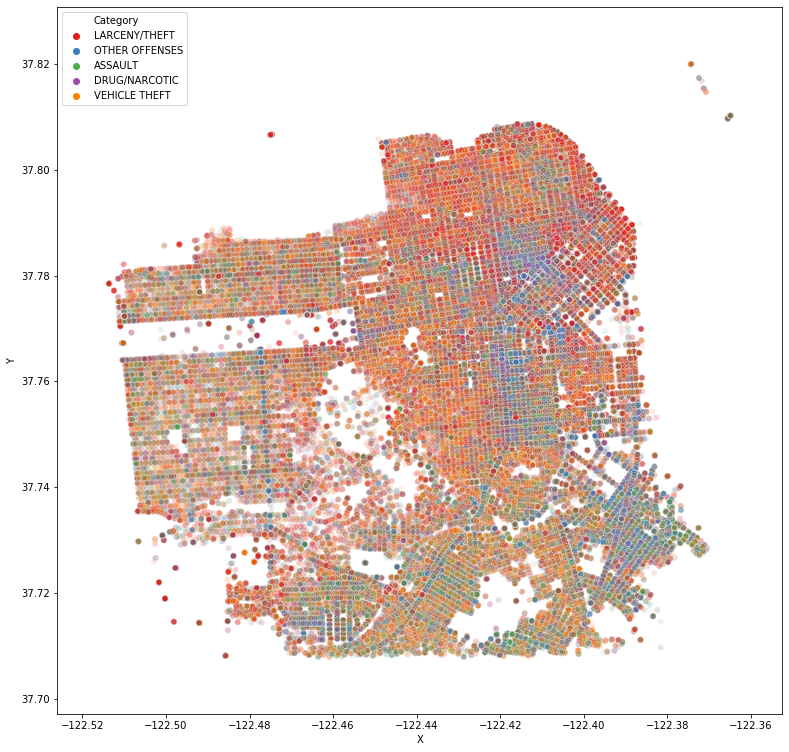

In [33]:
# 빈도가 높은 5개의 범죄 유형에 대한 시각화
crime1 = train['Category'] == 'LARCENY/THEFT'
crime2 = train['Category'] == 'OTHER OFFENSES'
crime3 = train['Category'] == 'ASSAULT'
crime4 = train['Category'] == 'DRUG/NARCOTIC'
crime5 = train['Category'] == 'VEHICLE THEFT'

crime_df = train[crime1|crime2|crime3|crime4|crime5]

top5_list = crime_df['Category'].value_counts().index

plt.figure(figsize=(13,13))
sns.scatterplot(data=crime_df, x='X', y='Y', alpha=0.1, hue='Category',
                hue_order=top5_list , palette="Set1")

### Q2-2) 결과 해석

**1. 샌프란시스코의 좌표 데이터이기 때문에, 샌프란시스코의 지도와 유사한 그림이 나올 것이다.**

- 이상치 데이터(-120.5, 90)가 전체 분포와 너무 멀리 떨어져 있기 때문에, 좌표 데이터가 좌하단이나 우상단으로 쏠리는 문제가 있었음. 하지만 이상치 제거 후 출력한 시각화는 샌프란시스코 지도와 유사한 그림이 나오는 것을 확인할 수 있음.

**2. 범죄 빈도에 따라 범죄가 자주 발생하는 지역과 그렇지 않은 지역이 구분될 것이다.**

- 시각화 결과를 확인하면 도시 중심지(지도 중앙부분)에서 범죄 발생률이 비교적 많은 것을 확인할 수 있음.

**3. 지역마다 자주 발생하는 범죄가 다를 것이다.**

- 예상한 것처럼 지역마다 확연하게 범죄 유형이 구분되지는 않았지만 ```LARCENY/THEFT```는 주로 북동쪽에서 많이 나타나는 것으로 보임.

In [34]:
# 지도의 빈 부분들을 확인하기 위해 folium 라이브러리 활용
import folium

def generateBaseMap(default_location=[37.759579, -122.441723], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

base_map = generateBaseMap()
base_map

=> 추가적으로 위 시각화에 나타난 공백부분은 산, 공원, 호수로 구성되 있음.

### Q2-3) 개선사항

1. 일단 이상치가 전체 데이터의 0.01%도 되지 않기 때문에, 이 아웃라이어를 해결한다고 ML모델의 성능이 크게 좋아지지는 않을 것임.
2. 범죄 종류(ex: 절도, 살인 등)마다의 좌표 데이터의 차이가 크지는 않지만 이 데이터를 머신러닝 모델에 집어 넣으면 성능을 좋게 만들 수 있을 것 같음.
3. 또한, 요일별 발생하는 범죄의 종류나 빈도가 차이가 있다면 이 부분도 모델의 성능을 개선시킬 수 있음.

## 3. DayOfWeek

```DayOfWeek```는 범죄가 발생한 요일에 대한 데이터임.

### Q3-1) 가설


**1. 범죄가 많이 발생하는 특정 요일이 존재할 것이다.**  
  
  - 가령 주중보다 주말에 범죄가 더 자주 발생할 것임.
  
**2. 범죄 유형에 따라 범죄가 자주 발생하는 요일이 존재할 것이다.**
  
  - 절도같은 범죄 유형은 유동인구가 많은 주말에 더 많이 발생할 것임.

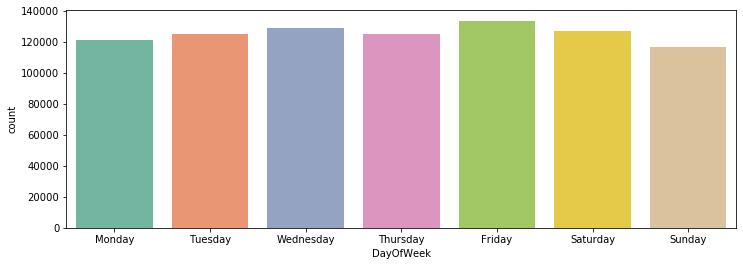

In [35]:
# 요일별 범죄발생 빈도 시각화
plt.figure(figsize = (12, 4))
dayofweek_list = ["Monday", "Tuesday", "Wednesday", "Thursday", 
                  "Friday", "Saturday", "Sunday"]

sns.countplot(data = train, x = "DayOfWeek", order = dayofweek_list, palette="Set2")

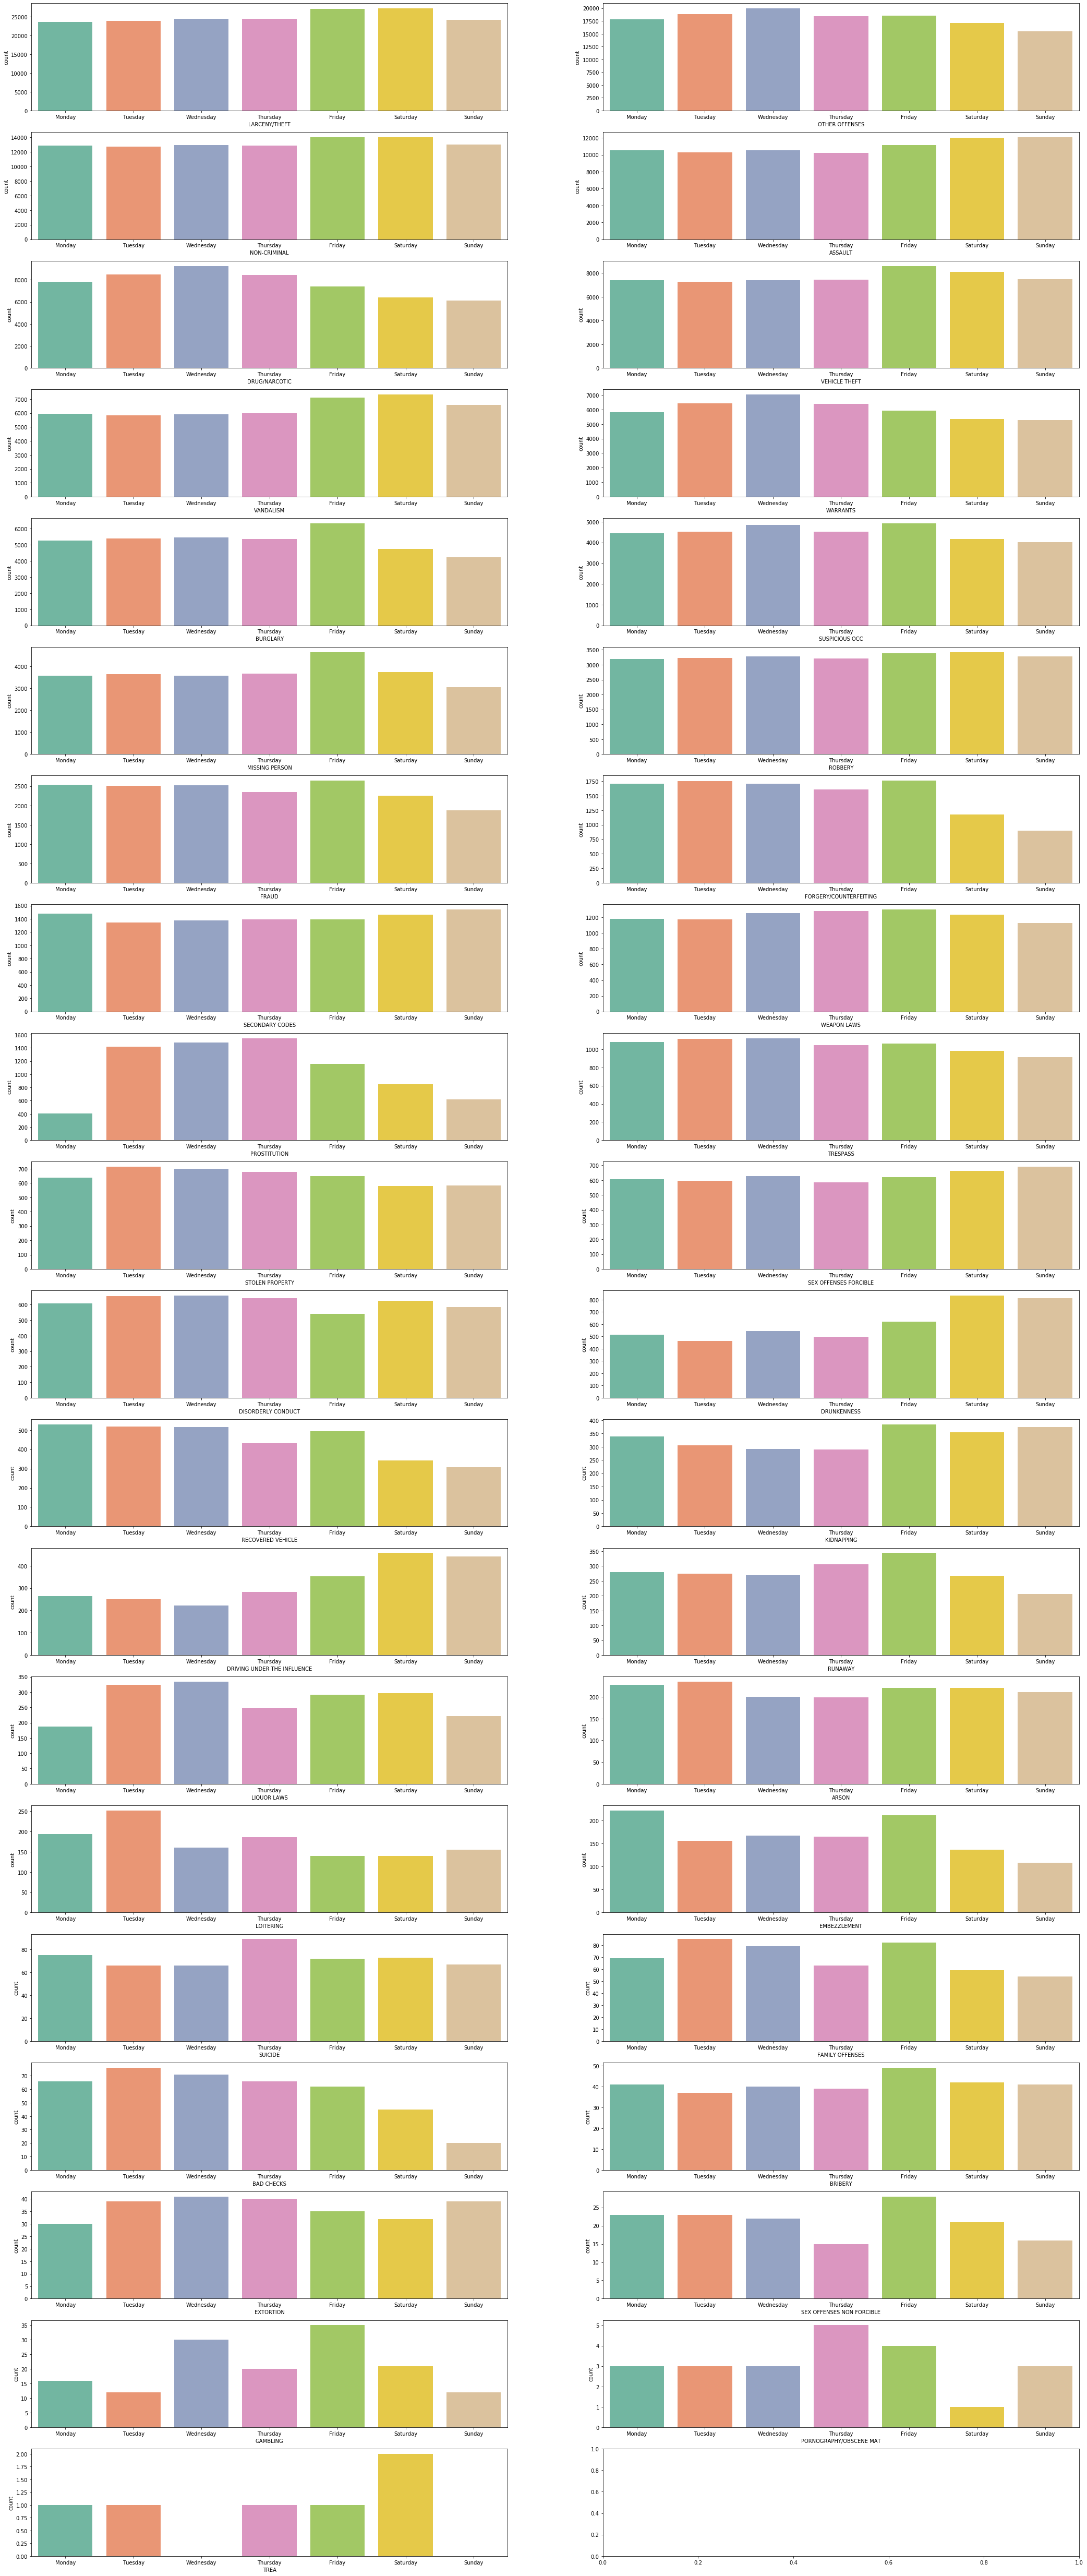

In [36]:
# 모든 범죄 유형에 대한 요일별 시각화 
figure, axes = plt.subplots(nrows = 20, ncols = 2)
figure.set_size_inches(36, 90)

category_list = train["Category"].value_counts().index

for row in range(20):
    for column in range(2):
        index = row * 2 + column
        
        if index < len(category_list):
            ax = axes[row][column]
            category = category_list[index]
        
            target = train[train["Category"] == category]
            sns.countplot(data = target, x = "DayOfWeek", order = dayofweek_list, ax = ax,
                         palette="Set2")

            ax.set(xlabel = category)

In [37]:
# 요일에 따른 종합 범죄빈도 PivotTable
dayofweek_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", 
                  "Saturday", "Sunday"]

pivot = pd.pivot_table(train, index='DayOfWeek', columns='Category',
                       fill_value=0, aggfunc='size')
pivot = pivot.reindex(dayofweek_list)
# 데이터프레임 전치 후 내림차순 정렬
order_pivot = pivot.T.sort_values(by=dayofweek_list, ascending=False)

# 범죄유형(Category) 중 'NON-CRIMINAL(범죄아님)' 제거
order_pivot = order_pivot.drop(['NON-CRIMINAL'],axis=0)
order_pivot

DayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Category,,,,,,,
LARCENY/THEFT,23568,23955,24484,24415,27102,27214,24147
OTHER OFFENSES,17783,18806,19946,18459,18587,17128,15456
ASSAULT,10559,10280,10553,10246,11157,11995,12082
DRUG/NARCOTIC,7823,8474,9267,8454,7420,6390,6143
VEHICLE THEFT,7412,7261,7412,7454,8612,8117,7504
VANDALISM,5945,5852,5927,5980,7092,7326,6602
WARRANTS,5811,6425,7028,6372,5926,5364,5280
BURGLARY,5262,5374,5457,5350,6326,4754,4231
SUSPICIOUS OCC,4447,4516,4851,4510,4923,4155,4010


### Q3-2) 결과 해석

**1. 범죄가 많이 발생하는 특정 요일이 존재할 것이다.** 

- 누적 범죄 빈도를 보면 요일별 편차가 크지는 않지만 금요일에 범죄가 가장 많이 발생하고 일요일에 가장 적게 발생하는 있음. 

**2. 범죄 유형에 따라 범죄가 자주 발생하는 요일이 존재할 것이다.**

- 요일마다 자주 발생하는 범죄의 유형이 조금은 다르다는 것을 알 수 있음. 특히, ```LARCENY/THEFT```는 주말(토,일)에 비교적 높은 빈도를 보이며, ```OTHER OFFENSES```는 유독 수요일에 비교적 높은 빈도를 보였음.



### Q3-3) 개선사항¶

**1. 요일에 따라 범죄 유형의 차이가 존재하기 때문에 요일 데이터로 모델의 성능을 개선시킬 수 있음.**  

**2. 범죄 종류가 다양해 분석하기 복잡하지만 특정 범죄 유형 하나를 정해 지역별로 시각화 해본다면 어느 도로, 구역에서 범죄가 발생하는 지를 확인할 수 있을 것임. 따라서, 특정 범죄가 자주 발생하는 요일과 지역에 경찰을 배치한다면 범죄율이 감소할 것임.**

## 4. PdDistrict
```PdDistrict```는 관할 경찰서에 대한 데이터임.

### Q4-1) 가설

**1. ```PdDistrict```별로 범죄 발생 빈도에 차이가 있을 것이다.**   
**2. 특정 범죄 발생 빈도가 높은 ```PdDistrict```가 존재할 것이다.**  


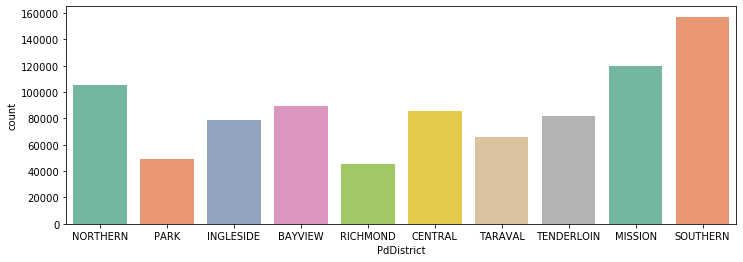

In [38]:
# 관할지역별 종합 범죄빈도 시각화
plt.figure(figsize = (12, 4))

sns.countplot(data = train, x = "PdDistrict", palette="Set2")

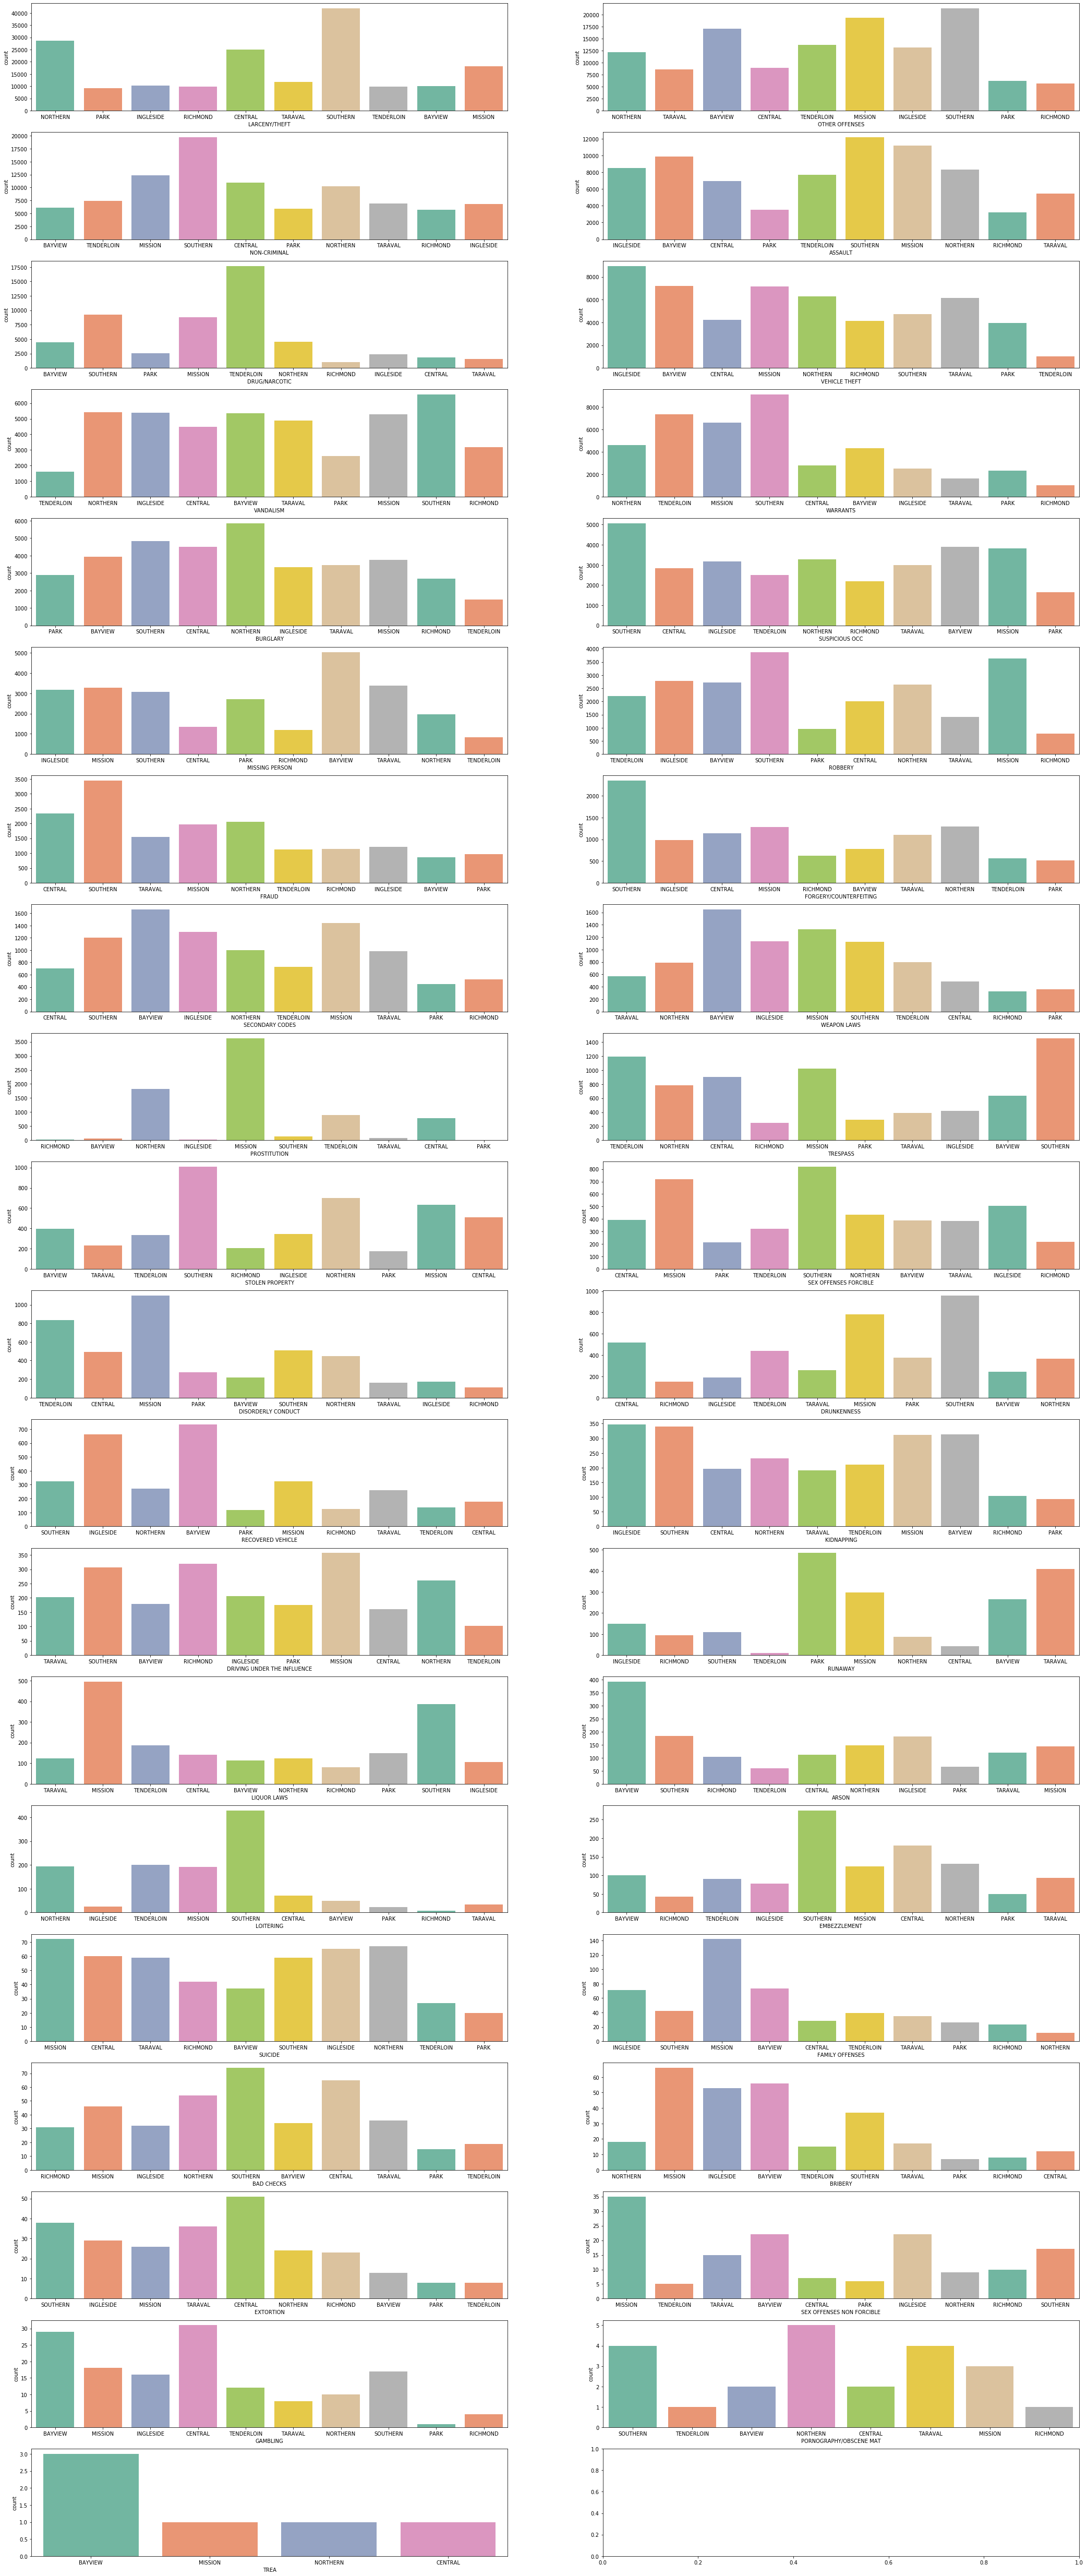

In [39]:
# 범죄 유형별 관할지역 범죄 빈도 시각화
figure, axes = plt.subplots(nrows = 20, ncols = 2)
figure.set_size_inches(36, 90)

category_list = train["Category"].value_counts().index

for row in range(20):
    for column in range(2):
        index = row * 2 + column
        
        if index < len(category_list):
            ax = axes[row][column]
            category = category_list[index]
        
            target = train[train["Category"] == category]
            sns.countplot(data = target, x = "PdDistrict", ax = ax, palette="Set2")

            ax.set(xlabel = category)

In [40]:
# 관할구약에 따른 종합 범죄빈도 PivotTable
pd_pivot = pd.pivot_table(train, index='Category', columns='PdDistrict',
                          fill_value=0, aggfunc='size')

district_list = train['PdDistrict'].value_counts().index.tolist()
pd_pivot = pd_pivot.sort_values(by=district_list, ascending=False)
pd_pivot.head(10)

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
LARCENY/THEFT,10118,25058,10235,18223,28628,9146,9891,41841,11844,9901
OTHER OFFENSES,17051,8899,13201,19329,12230,6184,5631,21307,8612,13721
NON-CRIMINAL,6099,10940,6853,12372,10240,5925,5744,19745,6919,7463
ASSAULT,9855,6977,8532,11149,8318,3515,3202,12183,5463,7678
DRUG/NARCOTIC,4498,1805,2373,8757,4511,2573,999,9228,1531,17696
WARRANTS,4322,2777,2528,6615,4595,2318,1010,9101,1616,7324
VANDALISM,5355,4469,5374,5294,5404,2613,3180,6550,4869,1616
SUSPICIOUS OCC,3905,2841,3167,3808,3270,1656,2191,5065,2996,2513
BURGLARY,3929,4519,3331,3745,5854,2888,2696,4841,3463,1488


### Q4-2) 결과 해석

**1. ```PdDistrict```별로 범죄 발생 빈도에 차이가 있을 것이다.**   
- SOUTHERN 지역의 경우 범죄률이 다른 지역에 비해 상당히 많이 발생하고 있음. 반대로 PARK, RICHMOND는 범죄률이 낮은 편임.

**2. 특정 범죄 발생 빈도가 높은 ```PdDistrict```가 존재할 것이다.**
- TARAVAL 지역의 경우 절도가 굉장히 많이 발생하고, RICHMOND 지역은 마약 범죄가 자주 발생함.

### Q4-3) 개선사항
**1. ```PdDistrict```별로 범죄 발생 비율에 차이가 있고, 특정 유형의 범죄가 자주 발생하는 지역들이 상당수 존재하기 때문에 모델을 개선시키는데 영향을 미치는 변수라고 판단됨.**

**2. 좌표(X, Y)와 범죄유형(Category), 주소(Address)와 결합한다면 범죄를 예방하는데 도움을 된다고 판단됨.**

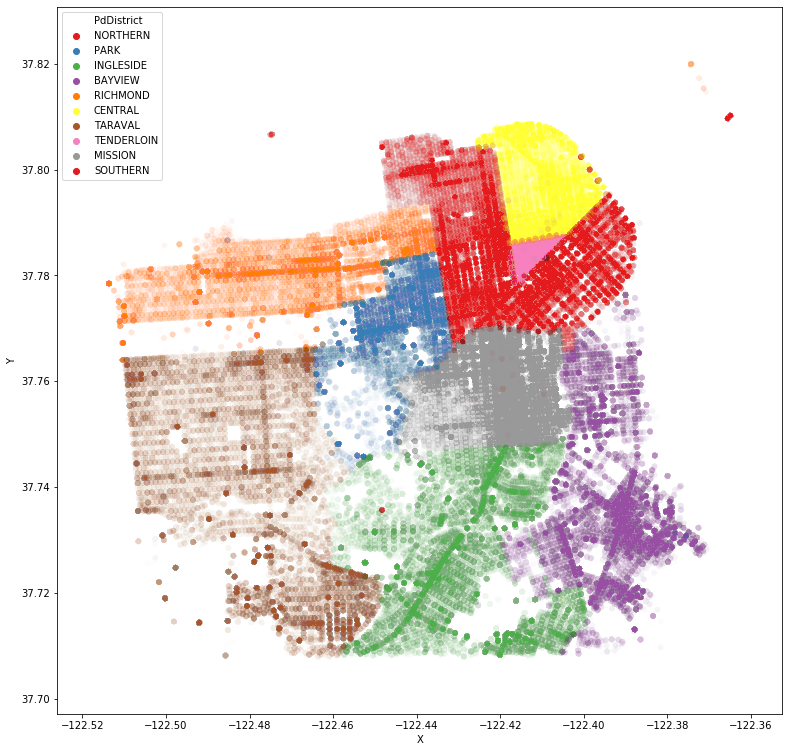

In [41]:
# 관할구역별 종합 범죄 빈도 시각화(추가)
plt.figure(figsize=(13,13))
sns.scatterplot(data=train, x='X', y='Y', alpha=0.01, hue='PdDistrict', palette="Set1")

## 5. Address
```Address```은 범죄가 발생한 상세 주소에 대한 데이터임.

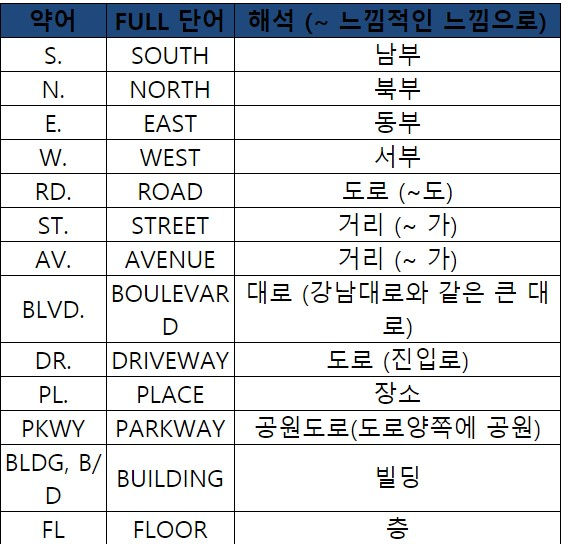

In [42]:
from IPython import display 
display.Image("address.jpg")

### Q5-1) 가설

**1. 좌표 데이터를 체계화시킨 데이터이기 때문에 범죄가 자주 발생하는 구역이 존재할 것이다.**

In [43]:
# 범죄 빈도가 높은 Address Top30
train['Address'].value_counts()[:20]

800 Block of BRYANT ST          26533
800 Block of MARKET ST           6581
2000 Block of MISSION ST         5097
1000 Block of POTRERO AV         4063
900 Block of MARKET ST           3251
0 Block of TURK ST               3228
0 Block of 6TH ST                2884
300 Block of ELLIS ST            2703
400 Block of ELLIS ST            2590
16TH ST / MISSION ST             2504
1000 Block of MARKET ST          2489
1100 Block of MARKET ST          2319
2000 Block of MARKET ST          2168
100 Block of OFARRELL ST         2140
700 Block of MARKET ST           2081
3200 Block of 20TH AV            2035
100 Block of 6TH ST              1887
500 Block of JOHNFKENNEDY DR     1824
TURK ST / TAYLOR ST              1810
200 Block of TURK ST             1800
Name: Address, dtype: int64

In [44]:
print('~거리 : ',len(train[train['Address'].str.contains('ST')]))
print('~거리 : ',len(train[train['Address'].str.contains('AV')]))
print('~도로 : ',len(train[train['Address'].str.contains('DR')]))
print('교차로 : ',len(train[train['Address'].str.contains('/')]))

~거리 :  702626
~거리 :  218952
~도로 :  16672
교차로 :  260751


In [45]:
# 비중이 높은 ST(거리)와 /(교차로)가 있는지에 대한 변수 설정
train["Crossroad"] = train["Address"].str.contains("/")
train["Street"] = train["Address"].str.contains("ST")


print(train.shape)
train[["Address", "Crossroad", "Street"]].head()

(877982, 15)


,Address,Crossroad,Street
0,OAK ST / LAGUNA ST,True,True
1,OAK ST / LAGUNA ST,True,True
2,VANNESS AV / GREENWICH ST,True,True
3,1500 Block of LOMBARD ST,False,True
4,100 Block of BRODERICK ST,False,True


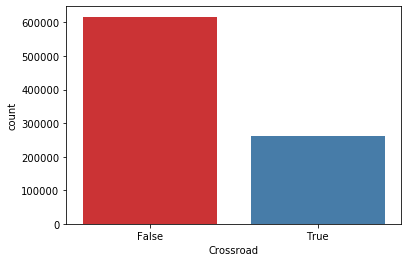

In [46]:
sns.countplot(data=train, x="Crossroad", palette="Set1")

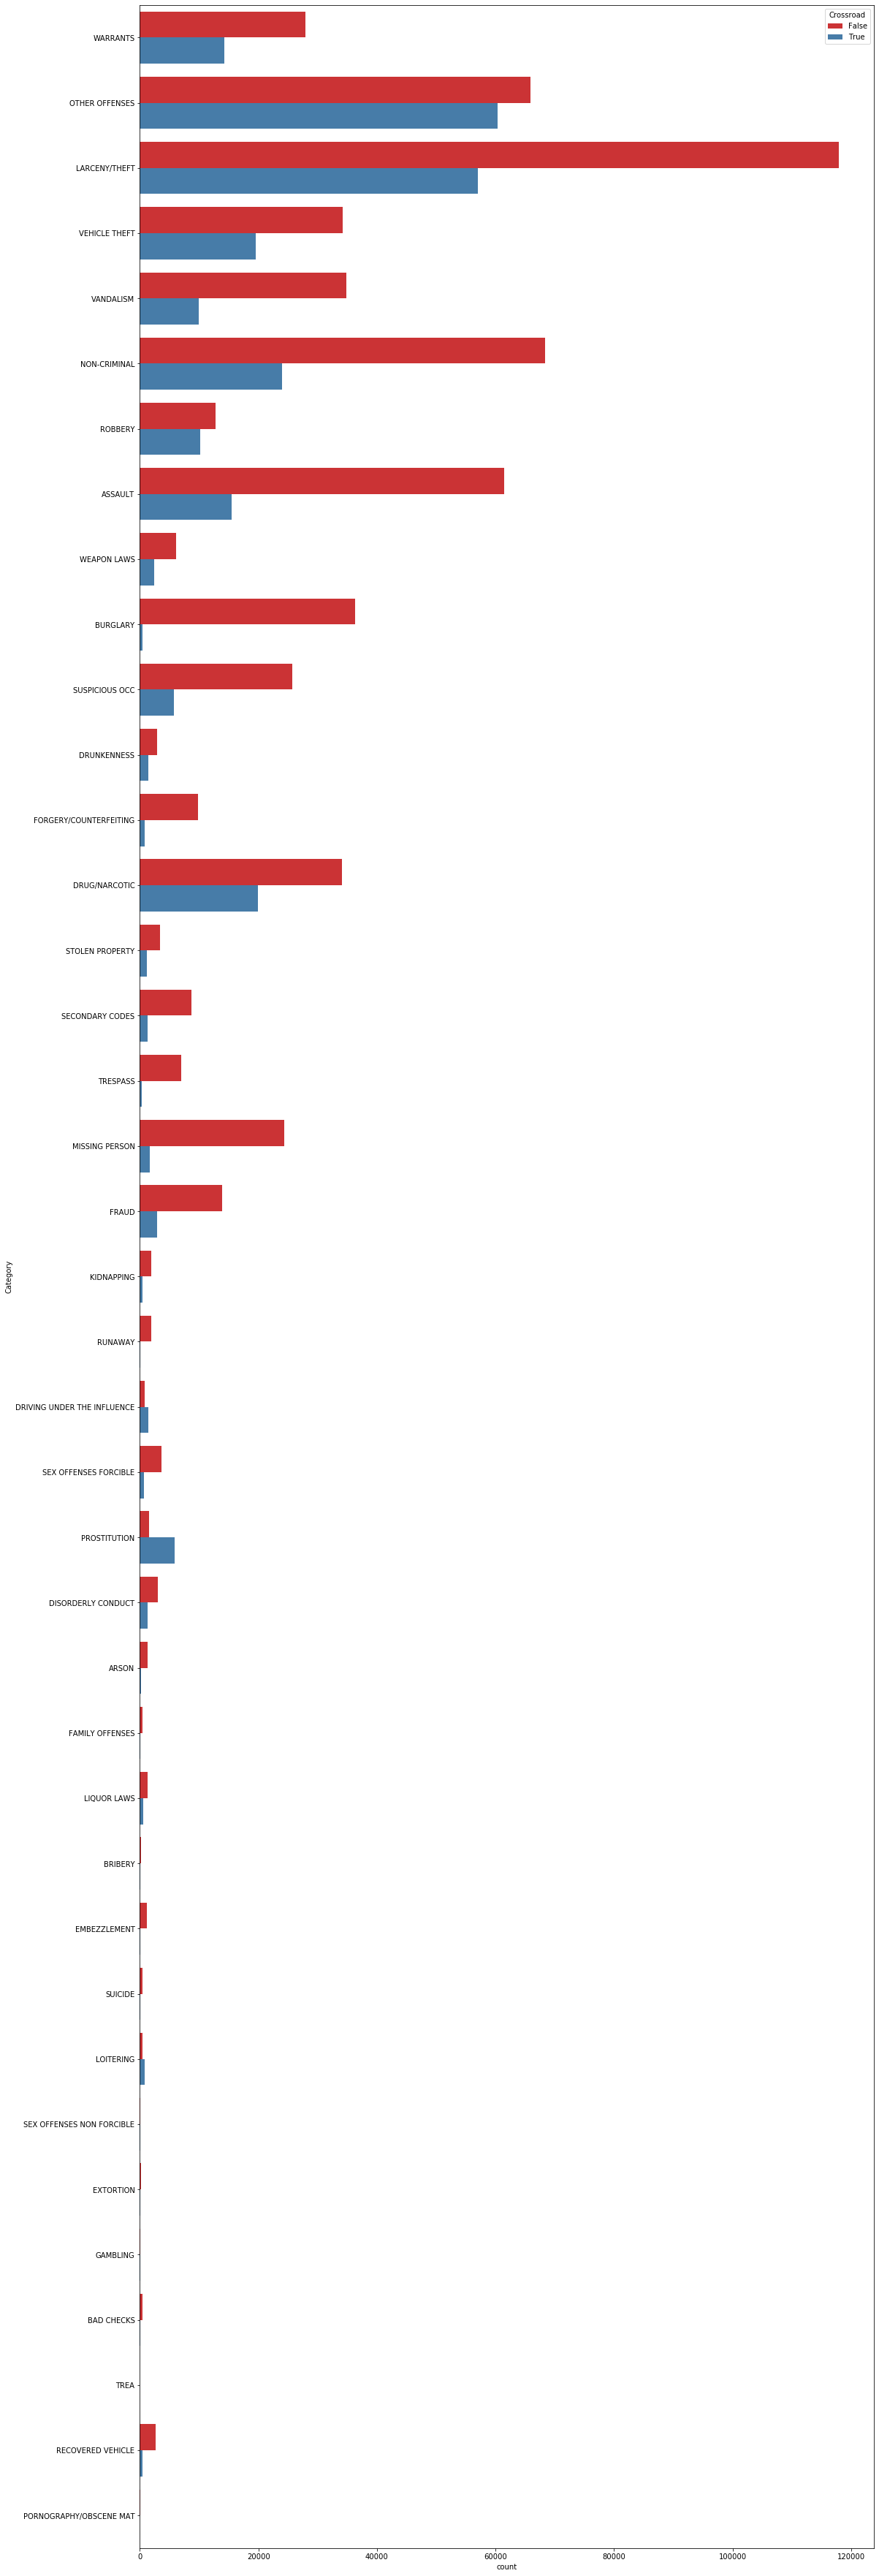

In [47]:
plt.figure(figsize = (18, 64))

sns.countplot(data=train, hue="Crossroad", y="Category", palette="Set1")

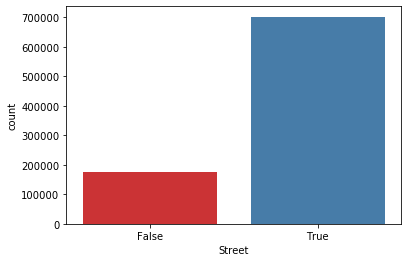

In [48]:
sns.countplot(data=train, x="Street", palette="Set1")

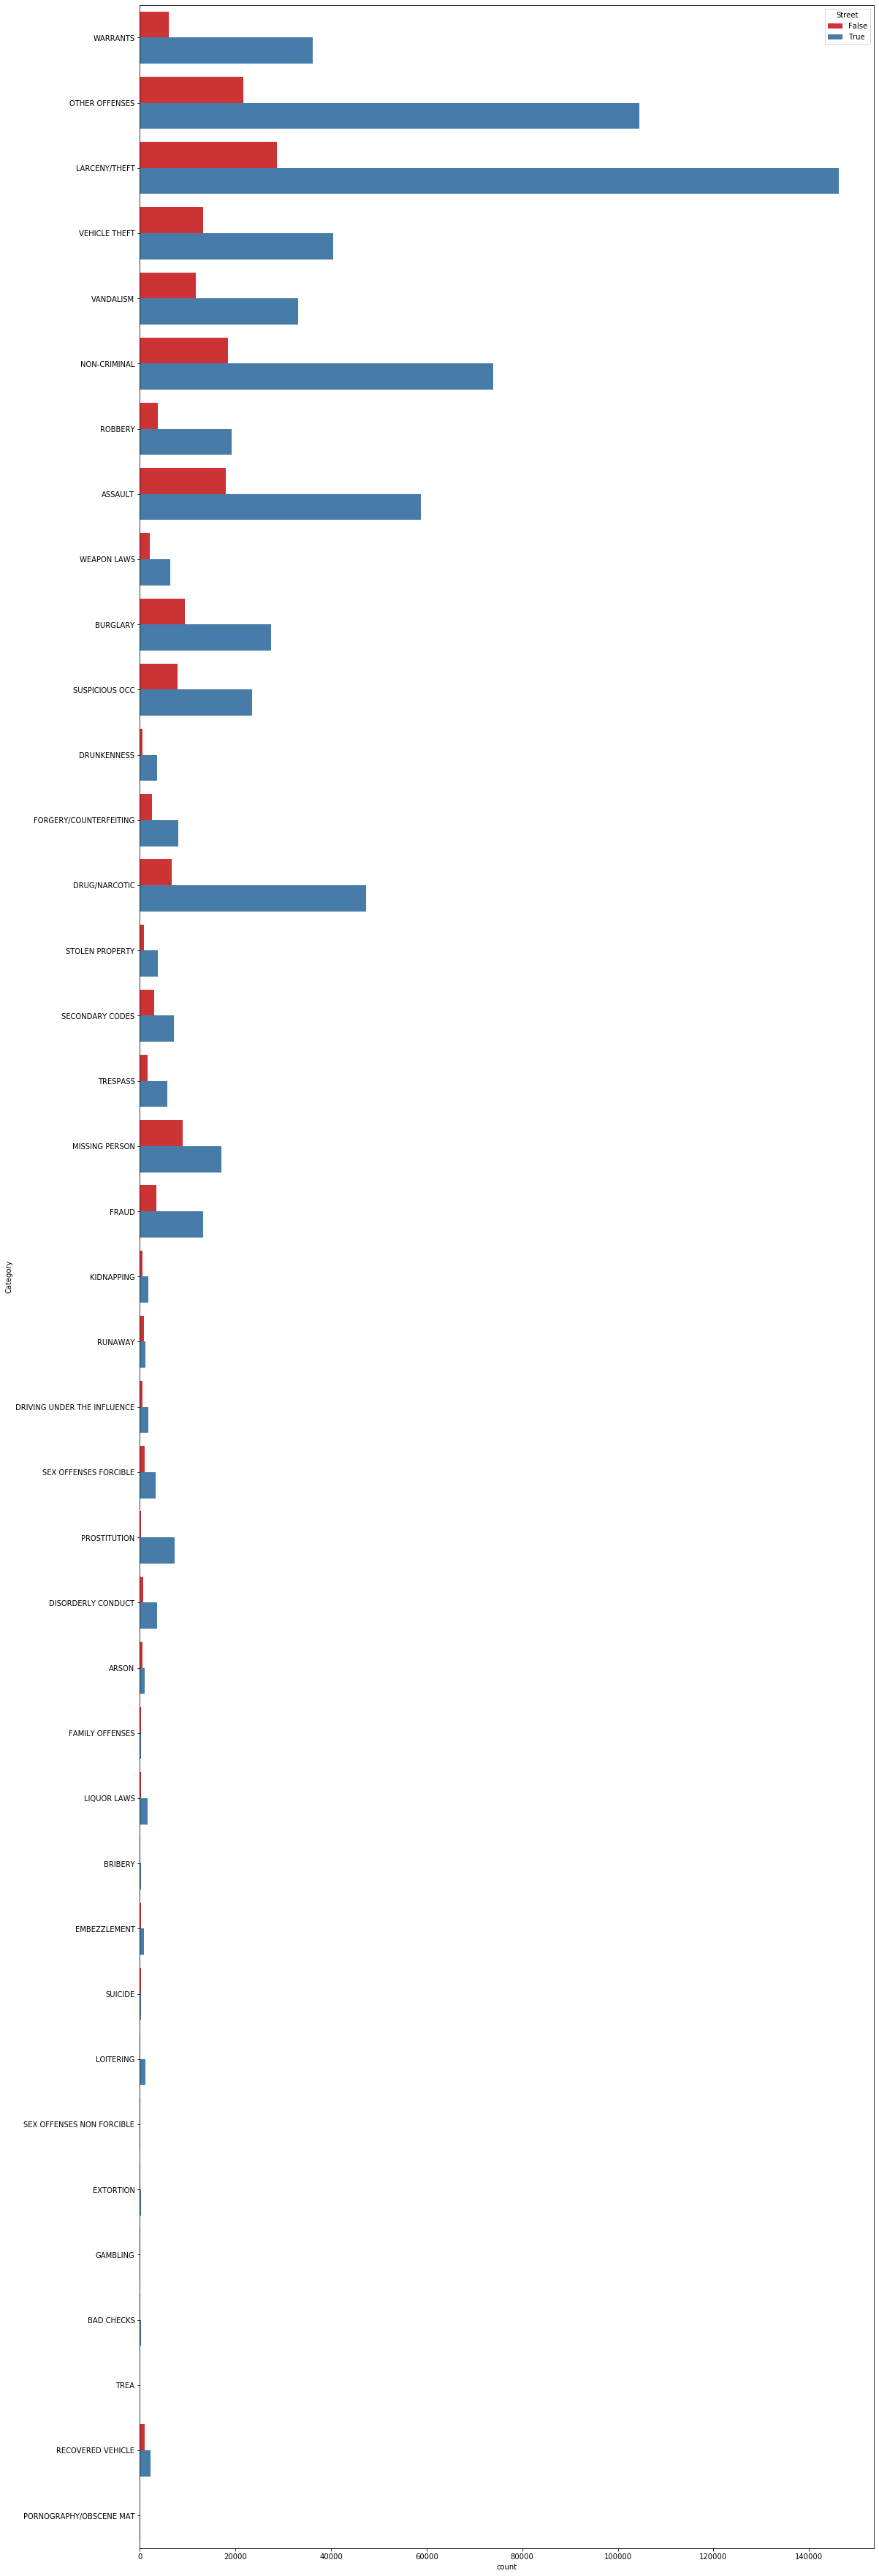

In [49]:
plt.figure(figsize = (18, 64))

sns.countplot(data=train, hue="Street", y="Category", palette="Set1")

### Q5-2) 결과 해석

**1. 좌표 데이터를 체계화시킨 데이터이기 때문에 범죄가 자주 발생하는 구역이 존재할 것이다.**
- ST와 같은 도로에 집중적으로 범죄가 발생하고 있으며, 도로가 교차하는 교차로(Crossroad)에서도 특정 범죄들이 빈번하게 발생하고 있음.

### Q5-3) 개선사항
- 범죄가 발생한 지역이 교차로(Crossraod) 또는 도로(ST)인지, 그렇지 않은지에 따라 범죄 유형이 구분됨으로 모델을 개선시키는데 도움이 될 것임.

#### 그 외 ```Descript```, ```Resolution``` 칼럼은 분석하기 모호해 사용하지 않기로 함.

## Preprocessing
**앞서 EDA에서 확인한 아래 지표들을 전처리할 것임(train, test 데이터에 적용).**   
- 날짜와 시간을 나타내는 Dates 컬럼    
- 좌표에 관한 이상치 데이터    
- 범죄 발생 요일을 나타내는 DayOfWeek 컬럼    
- 범죄 관할 경찰서를 나타내는 PdDistrict 컬럼
- 범죄 발생지역을 나타내는 Address 컬럼   

In [50]:
# train 데이터
train = pd.read_csv("SF_Crime/train.csv")
print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [51]:
# test 데이터
test = pd.read_csv("SF_Crime/test.csv")
print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


### Dates
- EDA에서 확인한 것처럼 minute(분), second(초)를 제외한 datetime형 데이터만 사용함.

In [52]:
# train Dates 컬럼
train["Dates"] = pd.to_datetime(train["Dates"])

train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour

train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour"]].head()

,Dates,Dates-year,Dates-month,Dates-day,Dates-hour
0,2015-05-13 23:53:00,2015,5,13,23
1,2015-05-13 23:53:00,2015,5,13,23
2,2015-05-13 23:33:00,2015,5,13,23
3,2015-05-13 23:30:00,2015,5,13,23
4,2015-05-13 23:30:00,2015,5,13,23


In [53]:
# test Dates 컬럼
test["Dates"] = pd.to_datetime(test["Dates"])

test["Dates-year"] = test["Dates"].dt.year
test["Dates-month"] = test["Dates"].dt.month
test["Dates-day"] = test["Dates"].dt.day
test["Dates-hour"] = test["Dates"].dt.hour

test[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour"]].head()

,Dates,Dates-year,Dates-month,Dates-day,Dates-hour
0,2015-05-10 23:59:00,2015,5,10,23
1,2015-05-10 23:51:00,2015,5,10,23
2,2015-05-10 23:50:00,2015,5,10,23
3,2015-05-10 23:45:00,2015,5,10,23
4,2015-05-10 23:45:00,2015,5,10,23


### X, Y
- EDA에서 확인한 것처럼 X, Y에 대한 이상치 데이터를 제거.

In [54]:
# train set
X_outliers = (train["X"] == train["X"].max())
Y_outliers = (train["Y"] == train["Y"].max())
train = train[~(X_outliers & Y_outliers)]

In [55]:
# # test set
# X_outliers = (test["X"] == test["X"].max())
# Y_outliers = (test["Y"] == test["Y"].max())
# test = test[~(X_outliers & Y_outliers)]

### DayOfWeek

- 요일(```DayOfWeek```)컬럼은 숫자형이 아니기 때문에 머신러닝 모델이 컬럼을 인식하기 어려움.   
따라서, ```One-Hot-Encoding```을 통해 문자형 데이터를 수치화시켜야함.

In [56]:
# train set
train_dayofweek = pd.get_dummies(train["DayOfWeek"], prefix = "DayOfWeek")
# 기존의 df에 새로운 칼럼 결합
train = pd.concat([train, train_dayofweek], axis = 1)
train.head(1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,0,0,0,0,0,0,1


In [57]:
# test set
test_dayofweek = pd.get_dummies(test["DayOfWeek"], prefix = "DayOfWeek")
# 기존의 df에 새로운 칼럼 결합
test = pd.concat([test, test_dayofweek], axis = 1)
test.head(1)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,0,0,0,1,0,0,0


### PdDistrict

- 관할구역(```PdDistrict```)컬럼 역시 숫자형이 아니기 때문에 머신러닝 모델이 컬럼을 인식하기 어려움.   
따라서, ```One-Hot-Encoding```을 통해 문자형 데이터를 수치화시켜야함.

In [58]:
# train set
train_pddistrict = pd.get_dummies(train["PdDistrict"], prefix = "PdDistrict")
# 기존의 df에 새로운 칼럼 결합
train = pd.concat([train, train_pddistrict], axis = 1)
train.head(1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0


In [59]:
# test set
test_pddistrict = pd.get_dummies(test["PdDistrict"], prefix = "PdDistrict")
# 기존의 df에 새로운 칼럼 결합
test = pd.concat([test, test_pddistrict], axis = 1)
test.head(1)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,1,0,0,0,0,0,0,0,0,0


### Address
- EDA에서 확인한 것처럼 교차로(Crossroad), 도로(ST) 컬럼 생성.

In [60]:
# train set
train["Crossroad"] = train["Address"].str.contains("/")
train["Street"] = train["Address"].str.contains("ST")

train.head(1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Crossroad,Street
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,1,0,0,0,0,0,True,True


In [61]:
# test set
test["Crossroad"] = test["Address"].str.contains("/")
test["Street"] = test["Address"].str.contains("ST")

test.head(1)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,...,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Crossroad,Street
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,0,0,0,0,0,0,0,0,False,False


### DataSet 분할(X_train, X_test, y_train)
* **Feature**: 날짜와 시간(```Dates```), 위도와 경도(```X```, ```Y```), 요일(```DayOfWeek```), 관할 경찰서(```PdDistrict```) + a 등등...  
* **Label**: 범죄의 유형 종류(```Category```)

In [62]:
# train의 전체 칼럼 리스트
col_list = train.columns.tolist()

# 분석에 필요하지 않는 컬럼 제거
not_features = ['Category', 'Dates','Descript','DayOfWeek','PdDistrict',
                'Resolution','Address']

features = [x for x in col_list if x not in not_features]
features

['X',
 'Y',
 'Dates-year',
 'Dates-month',
 'Dates-day',
 'Dates-hour',
 'DayOfWeek_Friday',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN',
 'Crossroad',
 'Street']

In [63]:
# 머신러닝 모델을 통해 최종적으로 예측하고자 하는 컬럼 Category
label = "Category"
label

'Category'

In [64]:
# 머신러닝에 적용하기 위한 데이터 분할
X_train = train[features]
X_test = test[features]
y_train = train[label]

In [65]:
# train 데이터를 7:3비율로 분할, seed 고정
X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

print(X_train_kf.shape, y_train_kf.shape)
print(X_test_kf.shape, y_test_kf.shape)

(614587, 25) (614587,)
(263395, 25) (263395,)


## Random Forest

In [66]:
# 머신러닝 모델 학습(fitting)
rf_model = RandomForestClassifier(n_estimators = 10, # 생성할 트개 개수
                              n_jobs = -1, # 병렬처리 여부
                              random_state = 37)
rf_model.fit(X_train_kf, y_train_kf)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=37)

In [67]:
# 모델 예측(predict)
# log loss로 모델을 평가할 예정이므로 predict_proba 사용
rf_predict = rf_model.predict_proba(X_test_kf)

print(rf_predict.shape)
rf_predict

(263395, 39)


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.1 , 0.05, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.8 , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.2 , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.1 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

## Gradient Boosting Machine(LightGBM)

In [68]:
# 머신러닝 모델 학습(fitting) 
lgbm_model = LGBMClassifier(n_estimators = 10,
                       random_state = 37)
lgbm_model.fit(X_train_kf, y_train_kf)

LGBMClassifier(n_estimators=10, random_state=37)

In [69]:
# 모델 예측(predict)
# log loss로 모델을 평가할 예정이므로 predict_proba 사용
lgbm_predict = lgbm_model.predict_proba(X_test_kf)

print(lgbm_predict.shape)
lgbm_predict

(263395, 39)


array([[0.00128464, 0.07049501, 0.0003575 , ..., 0.06624689, 0.03617644,
        0.00795855],
       [0.00166422, 0.08417528, 0.0002681 , ..., 0.04767891, 0.06889455,
        0.00808867],
       [0.00146093, 0.08790309, 0.00045077, ..., 0.04763939, 0.04047652,
        0.00818168],
       ...,
       [0.00123492, 0.06871728, 0.00030325, ..., 0.04330632, 0.07073911,
        0.01011703],
       [0.00134298, 0.07473068, 0.00032978, ..., 0.06165281, 0.0484664 ,
        0.00901822],
       [0.00168286, 0.08833715, 0.00038093, ..., 0.04847903, 0.04118992,
        0.00832589]])

### Kaggle 측정공식 (Log loss)
$$
log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij})
$$

In [70]:
# Random Forest Score
score = log_loss(y_test_kf, rf_predict)

print(f"Score = {score:.5f}")

Score = 13.75806


In [71]:
# Gradient Boosting Machine Score
score = log_loss(y_test_kf, lgbm_predict)

print(f"Score = {score:.5f}")

Score = 2.55382


* Log loss 스코어가 낮은 Gradient Boosting Machine 채택.

### Kaggle 제출

In [72]:
lgbm_model.fit(X_train, y_train)

LGBMClassifier(n_estimators=10, random_state=37)

In [73]:
prediction_list = lgbm_model.predict_proba(X_test)

# 캐글이 제공하는 제출 포멧(sampleSubmission.csv) loading.
sample_submission = pd.read_csv("SF_Crime/sampleSubmission.csv", index_col = "Id")

# 제출 포맷에 맞게 파라미터 조정
submission = pd.DataFrame(prediction_list,
                          index = sample_submission.index,
                          columns = lgbm_model.classes_)
submission.to_csv("result.csv")

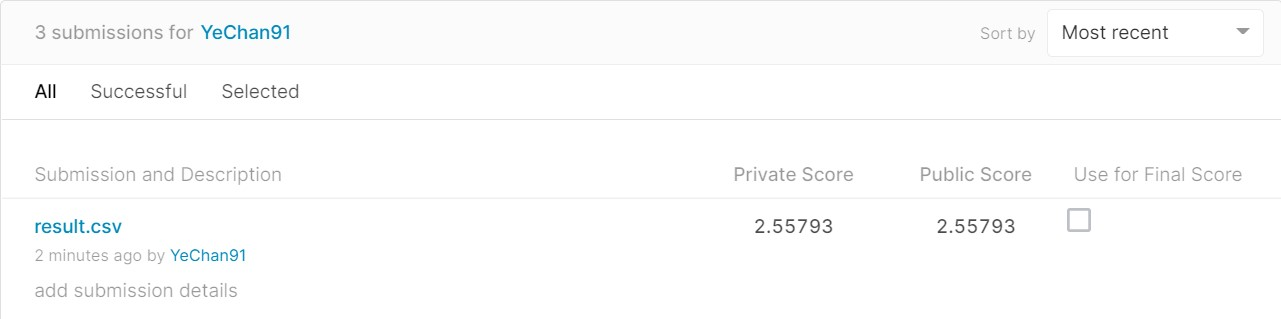

In [74]:
display.Image("C:/Users/YC/Desktop/result.jpg")